In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing import identify_irrelevant_object_columns, identify_columns_not_enough_values, identify_insignificant_object_columns

In [12]:
iter_csv = pd.read_csv('data/train.csv', iterator=True, chunksize=20000)
#df = pd.concat([chunk[chunk['field'] > constant] for chunk in iter_csv])

In [13]:
df = next(iter_csv)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
MachineIdentifier                                    20000 non-null object
ProductName                                          20000 non-null object
EngineVersion                                        20000 non-null object
AppVersion                                           20000 non-null object
AvSigVersion                                         20000 non-null object
IsBeta                                               20000 non-null int64
RtpStateBitfield                                     19929 non-null float64
IsSxsPassiveMode                                     20000 non-null int64
DefaultBrowsersIdentifier                            927 non-null float64
AVProductStatesIdentifier                            19917 non-null float64
AVProductsInstalled                                  19917 non-null float64
AVProductsEnabled                                    19917 non-nul

In [15]:
df.head(5)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


# delete irrelevant object columns

In [16]:
# delete object columns that have so many categories inside that no general rule can be derived from them (estimated)
irrelevant_object_columns = identify_irrelevant_object_columns(df, 0.1)
irrelevant_object_columns

['MachineIdentifier', 'AvSigVersion']

In [17]:
df.drop(irrelevant_object_columns, axis=1, inplace=True)

In [18]:
df.head(5)

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,NaN,53447.0,1.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,0,7.0,0,NaN,53447.0,1.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,NaN,53447.0,1.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,NaN,53447.0,1.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,NaN,53447.0,1.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


# delete columns with not enough values

In [19]:
# delete columns that have not enough values, aka less than 75% of total # of rows
cols = identify_columns_not_enough_values(df)
cols

['DefaultBrowsersIdentifier',
 'OrganizationIdentifier',
 'PuaMode',
 'SmartScreen',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [20]:
df.drop(cols, axis=1, inplace=True)
df.head(5)

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,0,7.0,0,53447.0,1.0,1.0,1,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


# analyzing categorical columns

In [22]:
cols_to_delete, scatter = identify_insignificant_object_columns(df)

In [14]:
threshold_mean_std

0.17682672449735282

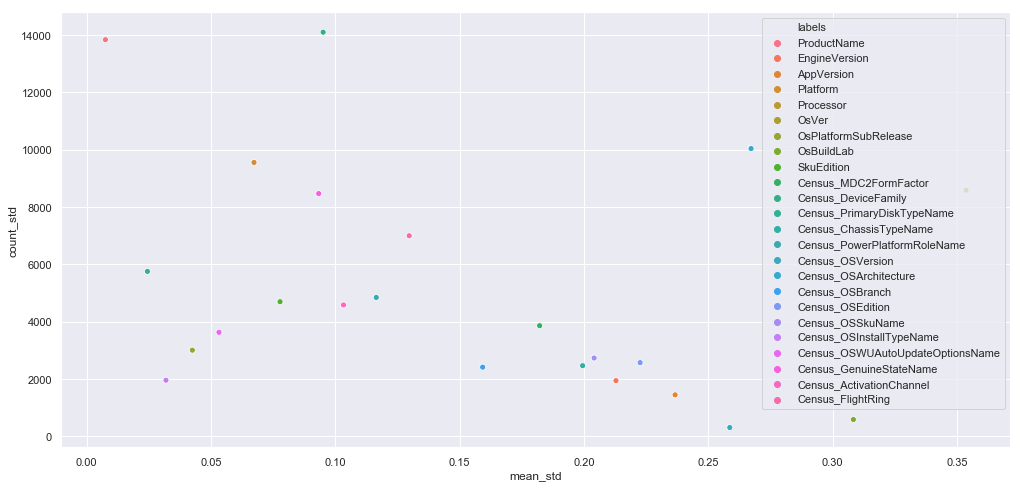

In [23]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
ax = sns.scatterplot(x="mean_std", y="count_std",data=scatter, hue="labels")

In [24]:
scatter.sort_values(by="mean_std", ascending = False)
#--> would make sense to automatically identify features from the quadrant in the bottom right and ignore the rest.

,labels,mean_std,count_std,status
5,OsVer,0.353653,8586.089302,delete
7,OsBuildLab,0.308341,580.775354,keep
15,Census_OSArchitecture,0.267205,10037.443914,delete
4,Processor,0.267047,10041.535009,delete
14,Census_OSVersion,0.258646,300.944891,keep
2,AppVersion,0.236656,1441.529316,keep
17,Census_OSEdition,0.222588,2567.121981,keep
1,EngineVersion,0.212876,1937.569362,keep
18,Census_OSSkuName,0.204106,2727.065604,keep
12,Census_ChassisTypeName,0.199467,2459.592449,keep


In [21]:
df.drop(cols_to_delete, axis=1, inplace=True)
df.head(5)

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


In [25]:
dimension = "Census_OSVersion"
df[[dimension, "HasDetections"]].groupby(dimension).mean().std() #--> should be high

HasDetections    0.258646
dtype: float64

In [26]:
df[[dimension, "HasDetections"]].groupby(dimension).count().std() #--> should be low

HasDetections    300.944891
dtype: float64

In [28]:
df[[dimension, "HasDetections"]].groupby(dimension).count()

,HasDetections
Census_OSVersion,
10.0.10240.16384,65
10.0.10240.16397,3
10.0.10240.16405,17
10.0.10240.16413,5
10.0.10240.16463,1
10.0.10240.16487,6
10.0.10240.16520,2
10.0.10240.16590,2
10.0.10240.16601,1


# Analyzing numerical features

In [29]:
df.groupby("HasDetections").mean()
#---> make percentage of max-min from max --> relevance of the differences!

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
HasDetections,,,,,,,,,,,,,,,,,,,,,
0,0.0,6.818758,0.018938,46276.995169,1.396678,1.025969,0.988477,107.923046,81814.993749,169.566333,...,0.0,404.262645,32841.403437,0.488677,0.011035,0.140681,0.038978,0.070434,0.256503,7.889244
1,0.0,6.888511,0.013074,49446.412242,1.245642,1.013023,0.987924,109.413174,81078.585861,170.627146,...,0.0,395.129754,32834.561263,0.482934,0.002500,0.108683,0.037026,0.043618,0.302008,7.791451


In [30]:
df.groupby("HasDetections").mean().std()

IsBeta                                               0.000000e+00
RtpStateBitfield                                     4.932256e-02
IsSxsPassiveMode                                     4.146491e-03
AVProductStatesIdentifier                            2.241116e+03
AVProductsInstalled                                  1.067988e-01
AVProductsEnabled                                    9.153748e-03
HasTpm                                               3.908902e-04
CountryIdentifier                                    1.053679e+00
CityIdentifier                                       5.207190e+02
GeoNameIdentifier                                    7.501081e-01
LocaleEnglishNameIdentifier                          2.460149e+00
OsBuild                                              8.240077e+01
OsSuite                                              1.327820e+01
IsProtected                                          1.835588e-02
AutoSampleOptIn                                      0.000000e+00
SMode     

# create dummies

In [31]:
object_columns = list(df.select_dtypes(include=['object']))
df_encoded = pd.get_dummies(df, prefix=object_columns)
df_encoded.shape
df_encoded.head(5)

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35,...,0,0,0,0,0,0,1,0,0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119,...,0,0,0,0,1,0,0,0,0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64,...,0,0,0,0,0,0,1,0,0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117,...,0,0,0,0,0,0,1,0,0,0
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277,...,0,0,0,0,0,0,1,0,0,0


# PCA

In [ ]:
# alternative idea: keep all features, factorize or one-hot everything, then do pca and then neural network.